# Regresion Avanzada - Trabajo Practico

## Instalacion de Librerias

In [1]:
# Autor: Andres Montes de Oca

# Instalacion de Paquetes
# !pip install pingouin
# !pip install scipy
# !pip install seaborn

# Cargamos Librerias y Datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from scipy import stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Para cargar imagenes de los enunciados del TP
from IPython.display import Image

# Ignorar Warnings
import warnings
warnings.filterwarnings('ignore')

# Asthetics
sns.set(style='ticks', context='notebook', palette='colorblind', font_scale=1, color_codes=True)      

## Cargas de Datasets

In [ ]:
# Iris para probar las Key Assumptions
# dataI = sns.load_dataset('iris')

# Modelo para Box-Cox usando dataset de cars
dataCars = pd.read_csv('Data/cars.csv')
model_cars = smf.ols('dist ~ speed', data=dataCars).fit()

#### Logbook

In [ ]:
# 31/05/23 -> Creacion de la Notebook
# 31/05/23 -> 1.1, 1.2
# 17/06/23 -> 1.3

## Capitulo 1: Regresion Lineal Simple

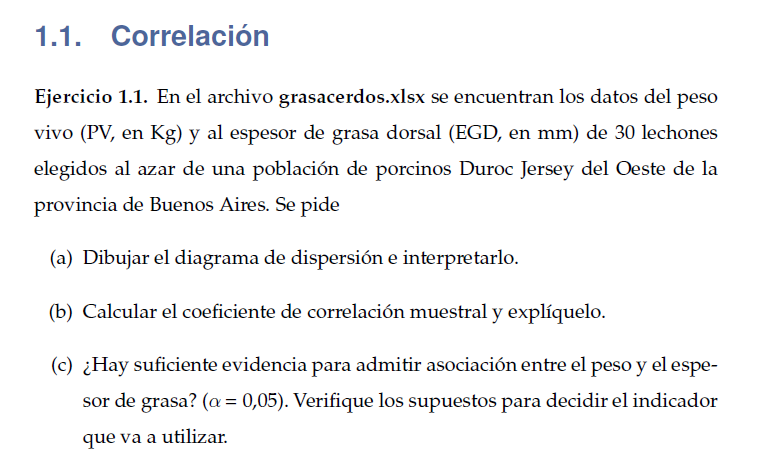

,PV,EGD
Obs,,
1,56.81,16.19
2,70.40,22.00
3,71.73,19.52
4,75.10,31.00
5,79.65,23.58


In [2]:
display(Image(filename='Img/1_1.png'))

# Grasa de Cerdos
dataC = pd.read_excel('Data/grasacerdos.xlsx', index_col='Obs') # Cargamos el Dataset
dataC = dataC.replace(to_replace=',', value='.', regex=True) # Reemplazo , por .
dataC = dataC.astype('float') # Transformo en float
data = dataC

data.head()

#### 1.1.a Grafico de Dispersion

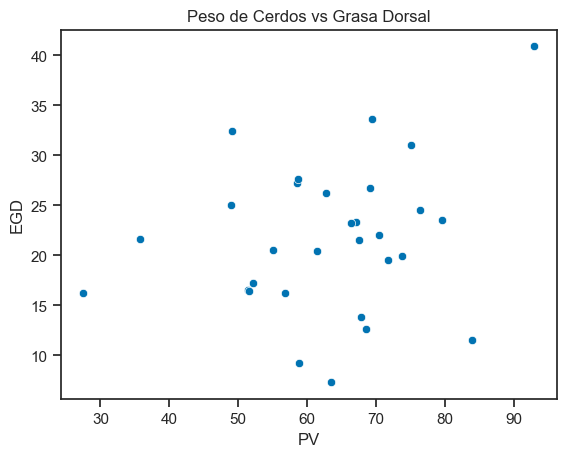

In [3]:
# Graficamos usando Seaborn
sns.scatterplot(data=data, x='PV', y='EGD')
plt.title('Peso de Cerdos vs Grasa Dorsal')
plt.show()

- No se observa ninguna correlacion

#### 1.1.b Calculo Coeficiente Correlacion

In [4]:
# Usando Pandas
print('Pearson:', data['PV'].corr(data['EGD'], method='pearson'))
print('Spearman:', data['PV'].corr(data['EGD'], method='spearman'))
print('Kendall:', data['PV'].corr(data['EGD'], method='kendall'), '\n')

# Usando Scipy Stats
print(st.pearsonr(data['PV'], data['EGD']))
print(st.spearmanr(data['PV'], data['EGD']))
print(st.kendalltau(data['PV'], data['EGD']))

# Usando Pingouin
display(pg.corr(data['PV'], data['EGD'], method='pearson'))
display(pg.corr(data['PV'], data['EGD'], method='spearman'))
display(pg.corr(data['PV'], data['EGD'], method='kendall'))

Pearson: 0.25434338918596944
Spearman: 0.16618464961067853
Kendall: 0.11264367816091954 

PearsonRResult(statistic=0.2543433891859694, pvalue=0.17499421195286707)
SignificanceResult(statistic=0.16618464961067853, pvalue=0.38011770642295883)
SignificanceResult(statistic=0.11264367816091954, pvalue=0.39503197640794263)


,n,r,CI95%,p-val,BF10,power
pearson,30,0.254343,"[-0.12, 0.56]",0.174994,0.546,0.27791


,n,r,CI95%,p-val,power
spearman,30,0.166185,"[-0.21, 0.5]",0.380118,0.142724


,n,r,CI95%,p-val,power
kendall,30,0.112644,"[-0.26, 0.45]",0.395032,0.091095


- Todos los coeficientes de correlacion son muy pequenos
- Confirmamos lo visto en el Scatterplot, no existe correlacion entre ambas variables

#### 1.1.c Existe Asociacion?

In [5]:
# Test de Normalidad Multivariada de Henze Zirkler
print(pg.multivariate_normality(data))

HZResults(hz=0.25394365632841115, pval=0.9049686197809698, normal=True)


- Si bien los las variables son Normales Bivaraidas, como vimos antes no parecen estar correlacionadas

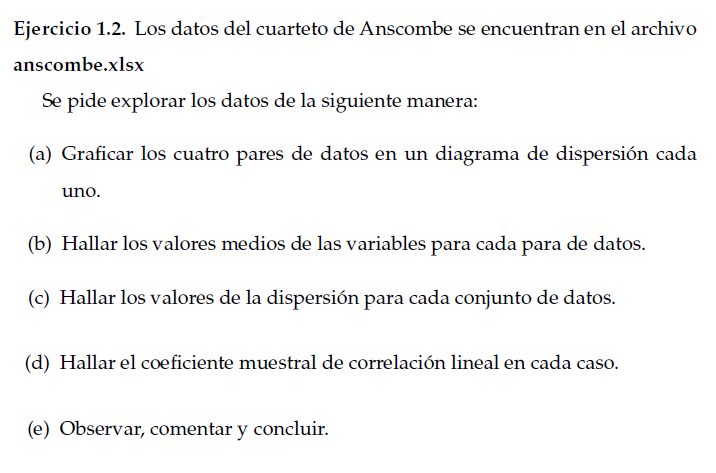

In [6]:
display(Image(filename='Img/1_2.png'))

#### 1.2 Anscombe

In [7]:
# Cargamos los datos
data = pd.read_excel('data/anscombe2.xlsx') # Cargamos la v2 completa
data

,x1,x2,x3,x4,y1,y2,y3,y4
0,10,10,10,8,8.04,9.14,7.46,6.58
1,8,8,8,8,6.95,8.14,6.77,5.76
2,13,13,13,8,7.58,8.74,12.74,7.71
3,9,9,9,8,8.81,8.77,7.11,8.84
4,11,11,11,8,8.33,9.26,7.81,8.47
5,14,14,14,8,9.96,8.10,8.84,7.04
6,6,6,6,8,7.24,6.13,6.08,5.25
7,4,4,4,19,4.26,3.10,5.39,12.50
8,12,12,12,8,10.84,9.13,8.15,5.56
9,7,7,7,8,4.82,7.26,6.42,7.91


Medias x1, y1: 9.0 7.5
Desvios: 3.317 2.032


,n,r,CI95%,p-val,BF10,power
pearson,11,0.816421,"[0.42, 0.95]",0.00217,22.903,0.917298


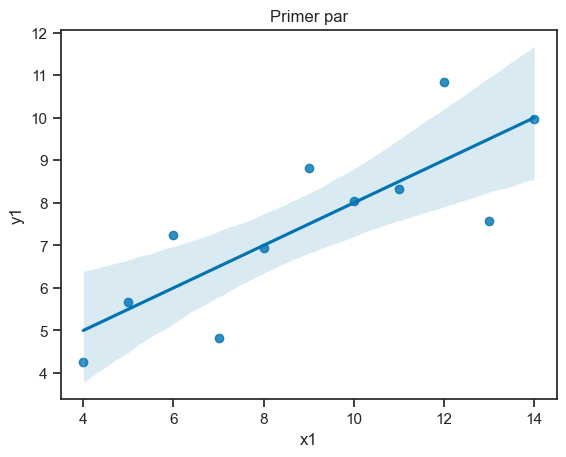

Medias x2, y2: 9.0 7.5
Desvios: 3.317 2.032


,n,r,CI95%,p-val,BF10,power
pearson,11,0.816237,"[0.42, 0.95]",0.002179,22.827,0.917056


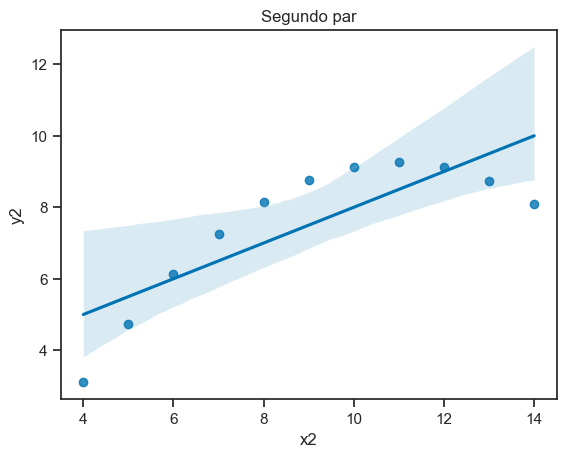

Medias x3, y3: 9.0 7.5
Desvios: 3.317 2.03


,n,r,CI95%,p-val,BF10,power
pearson,11,0.816287,"[0.42, 0.95]",0.002176,22.847,0.917122


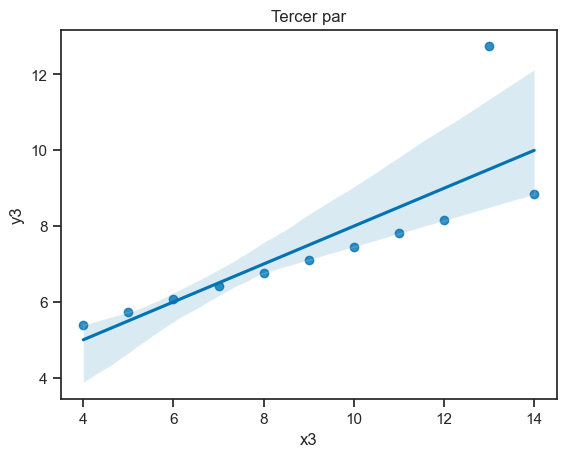

Medias x4, y4: 9.0 7.5
Desvios: 3.317 2.031


,n,r,CI95%,p-val,BF10,power
pearson,11,0.816521,"[0.42, 0.95]",0.002165,22.944,0.917431


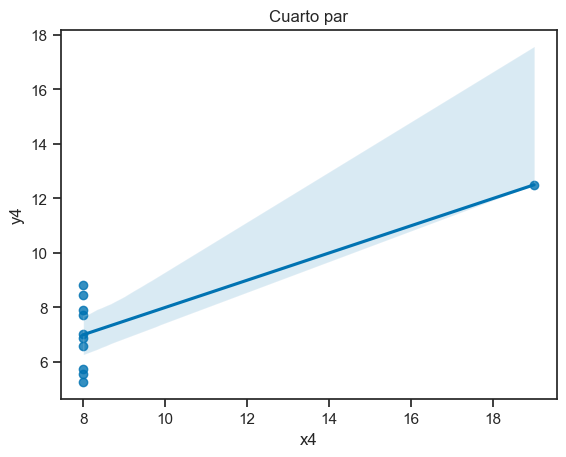

In [8]:
# Ploteamos
sns.regplot(data=data, x='x1', y='y1')
print('Medias x1, y1:', data['x1'].mean(), data['y1'].mean().round(2))
print('Desvios:', np.round(data['x1'].std(), 3), np.round(data['y1'].std(), 3))
display(pg.corr(data['x1'], data['y1'], method='pearson'))
plt.title('Primer par')
plt.show()

sns.regplot(data=data, x='x2', y='y2')
print('Medias x2, y2:', data['x2'].mean(), data['y2'].mean().round(2))
print('Desvios:', np.round(data['x2'].std(), 3), np.round(data['y2'].std(), 3))
display(pg.corr(data['x2'], data['y2'], method='pearson'))
plt.title('Segundo par')
plt.show()

sns.regplot(data=data, x='x3', y='y3')
print('Medias x3, y3:', data['x3'].mean(), data['y3'].mean().round(2))
print('Desvios:', np.round(data['x3'].std(), 3), np.round(data['y3'].std(), 3))
display(pg.corr(data['x3'], data['y3'], method='pearson'))
plt.title('Tercer par')
plt.show()

sns.regplot(data=data, x='x4', y='y4')
print('Medias x4, y4:', data['x4'].mean(), data['y4'].mean().round(2))
print('Desvios:', np.round(data['x4'].std(), 3), np.round(data['y4'].std(), 3))
display(pg.corr(data['x4'], data['y4'], method='pearson'))
plt.title('Cuarto par')
plt.show()

- El Coeficiente de Determinacion es mas parecido al Pipita Higuain que a Messi. Messi se parece mas al Coeficiente de Determinacion Ajustado

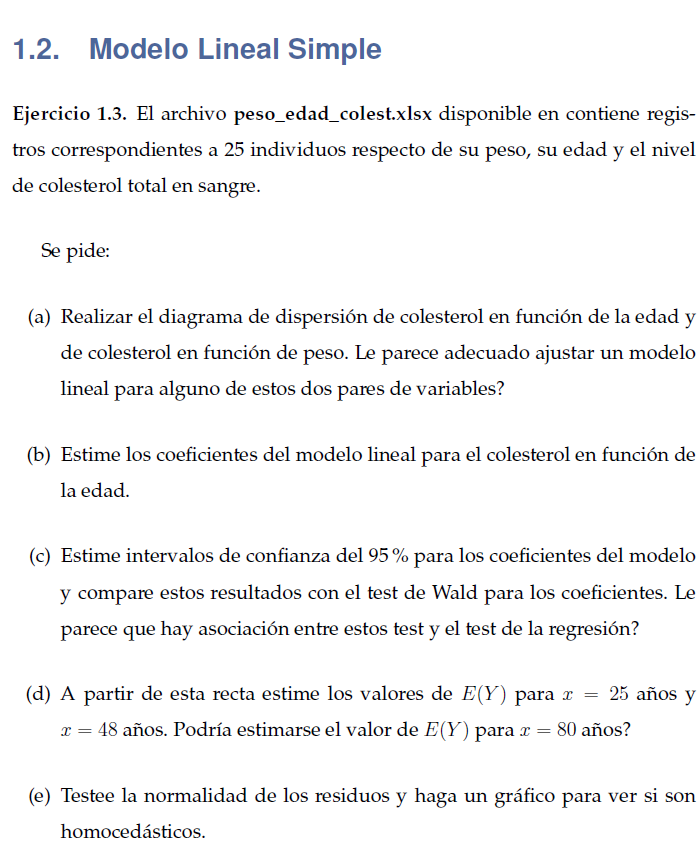

In [9]:
display(Image(filename='Img/1_2_b.png'))

In [13]:
# Cargamos los datos
data = pd.read_excel('Data/peso_edad_colest.xlsx')
data.head()

,peso,edad,colest
0,84,46,354
1,73,20,190
2,65,52,405
3,70,30,263
4,76,57,451


#### 1.2.a DIagrama de Dispersion

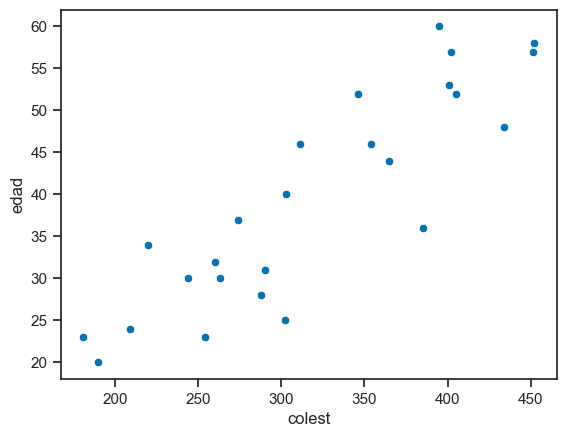

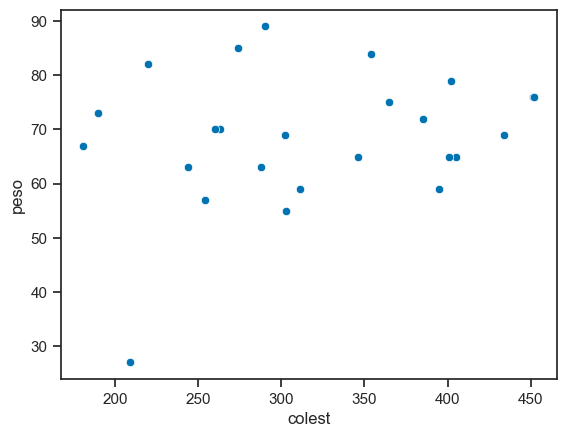

In [14]:
# Ploteamos
sns.scatterplot(data=data, x='colest', y='edad')
plt.show()

sns.scatterplot(data=data, x='colest', y='peso')
plt.show()

- La relacion para estar solamente entre Colestero y Edad

#### 1.2.b Coeficientes  de Correlacion

In [15]:
# Colesterol vs Edad
display(pg.corr(data['colest'], data['edad']))

,n,r,CI95%,p-val,BF10,power
pearson,25,0.881147,"[0.75, 0.95]",6.094237e-09,1.945e+06,0.999998


- Correlacion de 0.88

#### 1.2.c Modelo Lineal (Colesterol ~ Edad)

In [16]:
# Modelo Lineal 
data = sm.add_constant(data)
model_colest = smf.ols('colest ~ edad', data=data).fit()

print(model_colest.summary())

                            OLS Regression Results                            
Dep. Variable:                 colest   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     79.87
Date:                Mon, 19 Jun 2023   Prob (F-statistic):           6.09e-09
Time:                        19:36:06   Log-Likelihood:                -126.46
No. Observations:                  25   AIC:                             256.9
Df Residuals:                      23   BIC:                             259.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     95.5020     26.255      3.638      0.0

In [18]:
# Test de Wald
print(model_colest.wald_test('(edad = 0)'))

<F test: F=array([[79.87127565]]), p=6.0942368952344695e-09, df_denom=23, df_num=1>


- El summary del modelo me muestra solo 3 decimales, pero parecen ser los mismos

#### 1.2.d Prediccion para 25, 48 y 80 anos

In [24]:
# Genero el vector de test
Xtest = pd.Series((25, 48), name='edad')
Xtest = sm.add_constant(Xtest) # Agrego la columna constante
ypred = model_colest.predict(Xtest)
print('Predicciones para 25 y 48:', ypred)

# Maxima edad usada en el modelo
print('Maximo de edad:', data.edad.max())

Predicciones para 25 y 48: 0    237.273046
1    367.702405
dtype: float64
Maximo de edad: 60


- Puede estimarse, pero hay que tomarlo con cuidado porque esta fuera del alcance del dominio del modelo (60 anos)

#### 1.2.e Normalidad de Residuos

In [ ]:
# Test Analitico de Normalidad de los residuso
display(pg.normality(results.resid))

# Test Grafico de Homocedasticidad
plt.scatter(x=results.predict(), y=results.resid)
plt.xlabel( 'Prediccion')
plt.ylabel('Residuo')
plt.title('Distribucion de Residuos')
plt.axhline(color='grey', linestyle='dashed', alpha=0.5)
plt.show()


# Test Analiticos de Homocedasticidad - Breusch-Paga
_, p_value_lagrange, _, p_value_f =sm.stats.diagnostic.het_breuschpagan(results.resid, sm.add_constant(X))
print('p-values de Lagrange y del Estadistico F:\n', p_value_lagrange, p_value_f)

- Residuos Normales
- Residuos Homocedasticos (no se observa froma de embudo)
- Se confirma la Homocedasticidad con el Test de Breusch-Paga (aunque no se que p-value mirar)

In [ ]:
display(Image(filename='Img/1_3.png'))

In [ ]:
# Cargo y renombro sacandole el acento
data = pd.read_excel('Data/energia.xlsx')
data.rename(columns={'Energía':'Energia'}, inplace=True)
y=data['Energia']
data.head()

In [ ]:
# Confirmamos relacion lineal
display(pg.corr(data.index, data['Energia'], method='pearson')) # Entre dos varibales, H0 -> Variables Independientes

sns.regplot(data=data, x='Hora', y='Energia')
plt.show()

- No se observa relacion lineal

In [ ]:
# Modelamos y analizamos residuos
data = sm.add_constant(data)
model_Energia = smf.ols('Energia ~ Hora', data=data).fit()
print(model_Energia.summary())

- El modelo no es bueno ya que no existe relacion lineal entre las variables

In [ ]:
# Analisis Normalidad de Residuos
display(pg.normality(model_Energia.resid))

# Analitico (Breusch-Pagan Test) -> H0: Residuos Homocedasticos
BP, p_value, _, _ =sm.stats.het_breuschpagan(model_Energia.resid, model_Energia.model.exog)
print('Estadistico BP y p-value:', BP, p_value)

# Durbin-Watson Test: 2=No Correlacion (Independecia?)| 0=Correlacion Pos | 4=Correlacion Neg
print('Durbin-Watson:', sm.stats.durbin_watson(model_Energia.resid)) # Sin validacion Estadistica

- Los residuos no se distribuyen normalmente, aunque si parecen ser Homocedasticos y No-Correlacionados

In [ ]:
# Transformacion Box-Cox de la variable dependiente
maxlog = st.boxcox(y)[1]
st.boxcox_normplot(y, -2, 2, plt)
plt.axvline(maxlog, color='red')
plt.show()

# Transfomracion: Si Lambda  = 0 -> np.log10(y) | y**Lambda
y_trans = pd.Series(y**maxlog, name='y_trans') # Transformamos potenciando a la -1.5 aprox

- Transformamos elevando la variable Target a la -1.5

In [ ]:
# Generamos el nuevo Dataset con la y transformada
data = pd.concat([data, y_trans], axis=1)
data.head()

In [ ]:
# Generamos el nuevo modelo con la y_transformada
model_Energia_trans = smf.ols('y_trans ~ Hora', data=data).fit()

# Verificamos la nueva normalidad de los residuos
print(pg.normality(model_Energia_trans.resid))

- Se ve como al aplicar la transofmracion, los resultados del nuevo modelo si se distribuyen Normalmente

In [ ]:
# Analsis grafico de la Homocedasticidad
plt.scatter(x=model_Energia_trans.predict(), y=model_Energia_trans.resid)
plt.xlabel( 'Prediccion a la -1.5')
plt.ylabel('Residuo')
plt.title('Distribucion de Residuos')
plt.axhline(color='grey', linestyle='dashed', alpha=0.5)
plt.show()
# No se observa estructura de embudo

# Analitico (Breusch-Pagan Test) -> H0: Residuos Homocedasticos
BP, p_value, _, _ =sm.stats.het_breuschpagan(model_Energia_trans.resid, model_Energia_trans.model.exog)
print('Estadistico BP y p-value:', BP, p_value)

- Los residuos son Homocedasticos

In [ ]:
# Analsis de Correlacion de Residuos
plt.scatter(x=data.index, y=model_Energia_trans.resid)
plt.xlabel( 'Index')
plt.ylabel('Residuo')
plt.title('Correlacion de Residuos')
plt.axhline(color='grey', linestyle='dashed', alpha=0.5)
plt.show()
# No se observa estructura

# Durbin-Watson Test: 2=No Correlacion (Independecia?)| 0=Correlacion Pos | 4=Correlacion Neg
print('Durbin-Watson:', sm.stats.durbin_watson(model_Energia_trans.resid)) # Sin validacion Estadistica

- No existe correlacion de Residuos

In [ ]:
# Intervalos de Confiazna y Prediccion PENDIENTE
x_test = pd.Series(27.5, name='Hora')
x_test = sm.add_constant(x_test)
y_pred = model_Energia_trans.predict(x_test)

print(y_pred)

- No entiendo el tema de como deberia invertir el resultado, para poder representarlo de manera facil
- Tampoco entieno el tema de Intervalos de Confianza y Prediccion